# Evaluation of the Models

In [171]:
import torch
import numpy as np
import torchgadgets as tg
import os
from pathlib import Path as P
from tbparse import SummaryReader
import tensorboard
import matplotlib.pyplot as plt
import json

In [181]:
num_iterations = 596
batch_size = 8
num_epochs = 10

def smooth_curve(f, K=5):
    """ Smoothing a function using a low-pass filter (mean) of size K """
    kernel = np.ones(K) / K
    f = np.concatenate([f[:int(K//2)], f, f[int(-K//2):]])  # to account for boundaries
    smooth_f = np.convolve(f, kernel, mode="same")
    smooth_f = smooth_f[K//2: -K//2]  # removing boundary-fixes
    return smooth_f



def visualize_training(train_loss, eval_loss, accuracy, loss_ind=None):
    plt.style.use('seaborn-v0_8')

    if len(eval_loss) == 11:
        xticks = range(0, (num_epochs+1)*num_iterations,num_iterations)
        ta = xticks
        tc = np.arange(0, num_epochs+1)
    else:
        xticks = range(num_iterations, (num_epochs+1)*num_iterations,num_iterations)
        ta = range(0, (num_epochs+1)*num_iterations,num_iterations)
        tc = np.arange(0, num_epochs+1)

    print(len(eval_loss))
    print(len(xticks))

    fig, ax = plt.subplots(1,2, figsize=(16,8))

    smooth_loss = smooth_curve(train_loss, 51)
    if loss_ind is None:
        ax[0].plot(smooth_loss, label="Training Loss")
    else:
        ax[0].plot(loss_ind, smooth_loss, label="Training Loss")

    ax[0].plot(xticks, eval_loss, label="Evaluation Loss")
    ax[0].grid(True)
    ax[0].set_xlabel("# Epoch")
    ax[0].set_ylabel("CrossEntropy Loss")
    ax[0].set_xticks(ta, tc)
    ax[0].legend()

    ax[1].plot(accuracy, label="Evaluation Accuracy")
    ax[1].grid(True)
    ax[1].set_yticks(np.arange(0.0, 1.1, 0.1).tolist())
    ax[1].set_xlabel("# Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].grid(True)
    ax[1].set_ylim(0.0,1.0)
    ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax[1].legend()


    return fig



## LSTM-Cell Model

In [149]:
exp_name = "lstm_cell"
run_name = 'test_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')


In [150]:
reader = SummaryReader(log_dir, pivot=True)
data = reader.scalars
data

,step,epoch_metrics/accuracy,epoch_metrics/eval_loss,epoch_metrics/evaluation/accuracy,epoch_metrics/evaluation/accuracy_top3,epoch_metrics/evaluation/f1,epoch_metrics/evaluation/precision,epoch_metrics/evaluation/recall,iteration_metrics/train_loss
0,0,0.22375,1.786381,0.16875,0.3825,0.048128,0.166667,0.028125,NaN
1,1,0.65125,0.708131,NaN,NaN,NaN,NaN,NaN,1.780055
2,2,0.66500,0.701196,NaN,NaN,NaN,NaN,NaN,1.76419
3,3,0.72375,0.702316,NaN,NaN,NaN,NaN,NaN,1.72882
4,4,0.71625,0.681950,NaN,NaN,NaN,NaN,NaN,1.697827
...,...,...,...,...,...,...,...,...,...
5911,5911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201847
5912,5912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004422
5913,5913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007677
5914,5914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383777


In [151]:
lstm_eval_loss = data.loc[:,'epoch_metrics/eval_loss'].to_numpy()
lstm_accuracy = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
lstm_loss = data.loc[:, 'iteration_metrics/train_loss'].to_numpy()

lstm_accuracy = lstm_accuracy[:num_epochs+1].astype(float).tolist()
lstm_eval_loss = lstm_eval_loss[:num_epochs+1].astype(float).tolist()
lstm_loss_2 = lstm_loss[1:]

lstm_loss = []


for i in lstm_loss_2:
    if isinstance(i, list):
        continue
    lstm_loss.append(float(i))



11
11


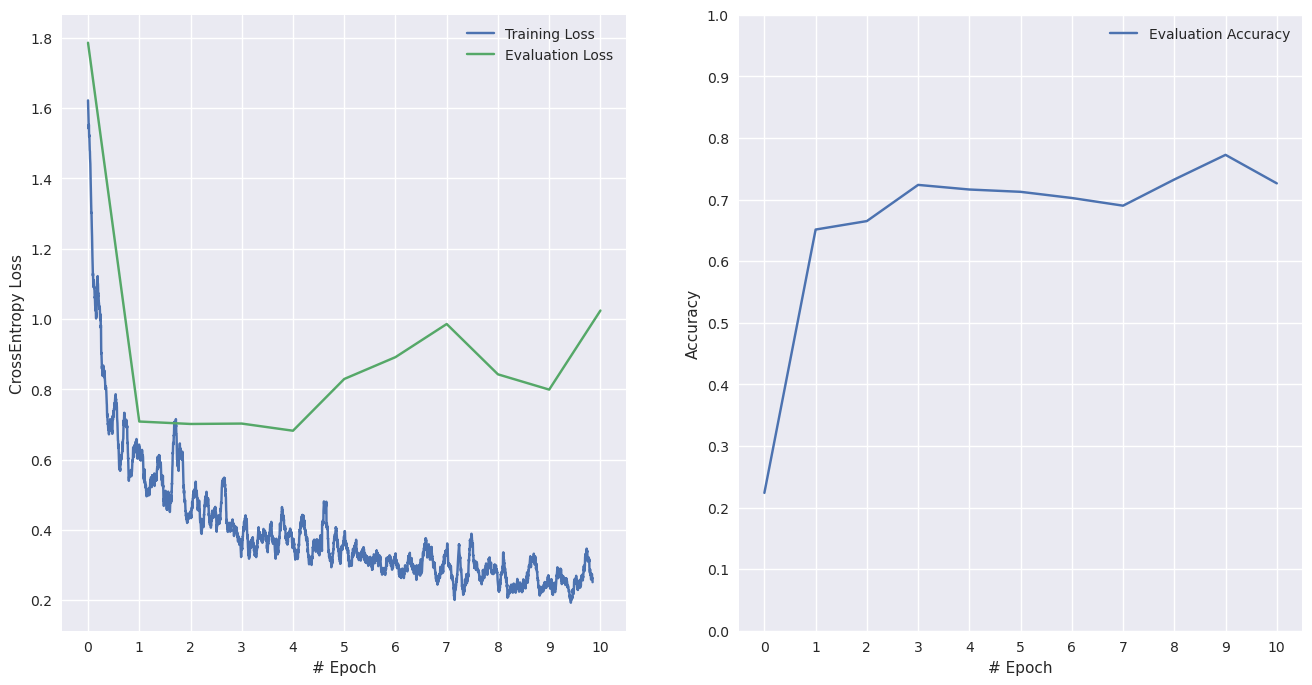

In [152]:
fig = visualize_training(lstm_loss, lstm_eval_loss, lstm_accuracy)
fig.show()

## GRU-Cell Model

###

In [161]:
exp_name = "gru_cell"
run_name = 'test_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')

reader = SummaryReader(log_dir, pivot=True)
data = reader.scalars
data

gru_eval_loss = data.loc[:,'epoch_metrics/eval_loss'].to_numpy()
gru_accuracy = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
gru_loss = data.loc[:, 'iteration_metrics/train_loss'].to_numpy()
gru_accuracy_2 = gru_accuracy[:num_epochs+1]
gru_eval_loss_2 = gru_eval_loss[:num_epochs+1]
gru_loss_2 = gru_loss[1:num_iterations*num_epochs]

gru_loss = []
gru_accuracy = []
gru_eval_loss = []


for i in gru_loss_2:
    if isinstance(i, list):
        continue
    gru_loss.append(float(i))

for i in gru_eval_loss_2:
    if isinstance(i, list):
        continue
    gru_eval_loss.append(float(i))

for i in gru_accuracy_2:
    if isinstance(i, list):
        continue
    gru_accuracy.append(float(i))


10
10


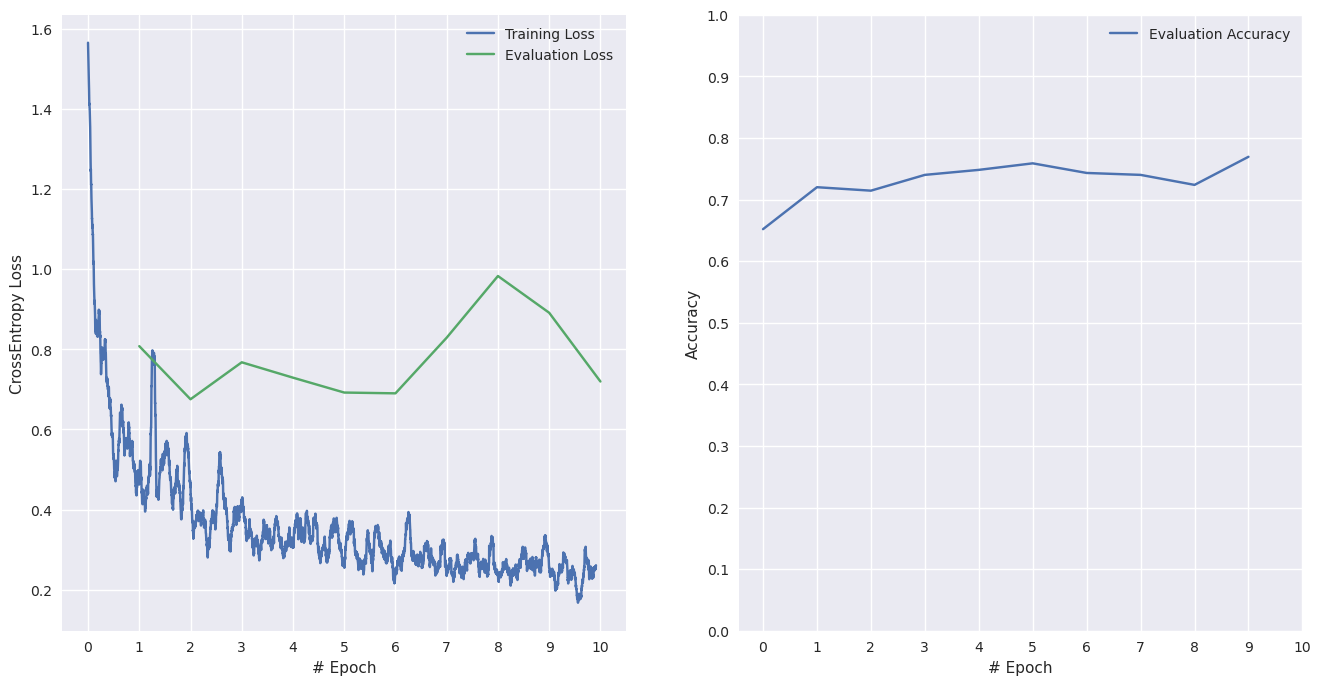

In [162]:
fig = visualize_training(gru_loss, gru_eval_loss, gru_accuracy)
fig.show()

## ConvLSTM

In [163]:
exp_name = "ConvLSTM"
run_name = 'model_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')

reader = SummaryReader(log_dir, pivot=True)
data = reader.scalars
data

clstm_eval_loss = data.loc[:,'epoch_metrics/eval_loss'].to_numpy()
clstm_accuracy = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
clstm_loss = data.loc[:, 'iteration_metrics/train_loss'].to_numpy()
clstm_accuracy_2 = clstm_accuracy[:num_epochs+1]
clstm_eval_loss_2 = clstm_eval_loss[:num_epochs+1]
clstm_loss_2 = clstm_loss[1:num_iterations*num_epochs]
clstm_loss = []
clstm_accuracy = []
clstm_eval_loss = []


for i in clstm_loss_2:
    if isinstance(i, list):
        continue
    clstm_loss.append(float(i))

for i in clstm_eval_loss_2:
    if isinstance(i, list):
        continue
    clstm_eval_loss.append(float(i))

for i in clstm_accuracy_2:
    if isinstance(i, list):
        continue
    clstm_accuracy.append(float(i))

11
11


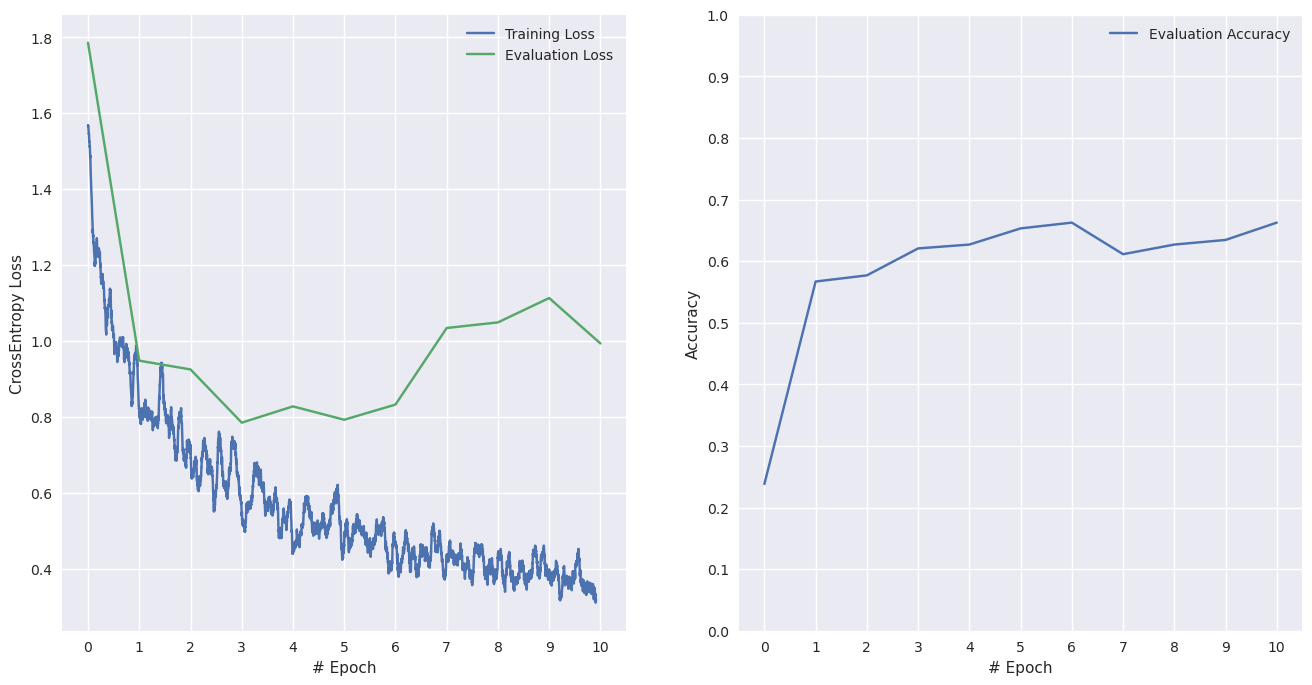

In [164]:
fig = visualize_training(clstm_loss, clstm_eval_loss, clstm_accuracy)
fig.show()

## RNN Model

In [195]:
rnn_data_path = P("../rnn_data/")

with open(str(rnn_data_path / 'rnn_acc.json'), 'r') as f:
    rnn_acc = json.load(f)

with open(str(rnn_data_path / 'rnn_loss.json'), 'r') as f:
    rnn_loss = json.load(f)

with open(str(rnn_data_path / 'rnn_eval_loss.json'), 'r') as f:
    rnn_eval_loss = json.load(f)

rnn_acc = [i[2] for i in rnn_acc]
loss_ind = [i[1] for i in rnn_loss]
rnn_loss = [i[2] for i in rnn_loss]
rnn_eval_loss = [i[2] for i in rnn_eval_loss]

rnn_acc = rnn_acc[:num_epochs+1]
rnn_eval_loss = rnn_eval_loss[:num_epochs+1]
rnn_loss = rnn_loss[:665]
loss_ind = loss_ind[:665]




11
11


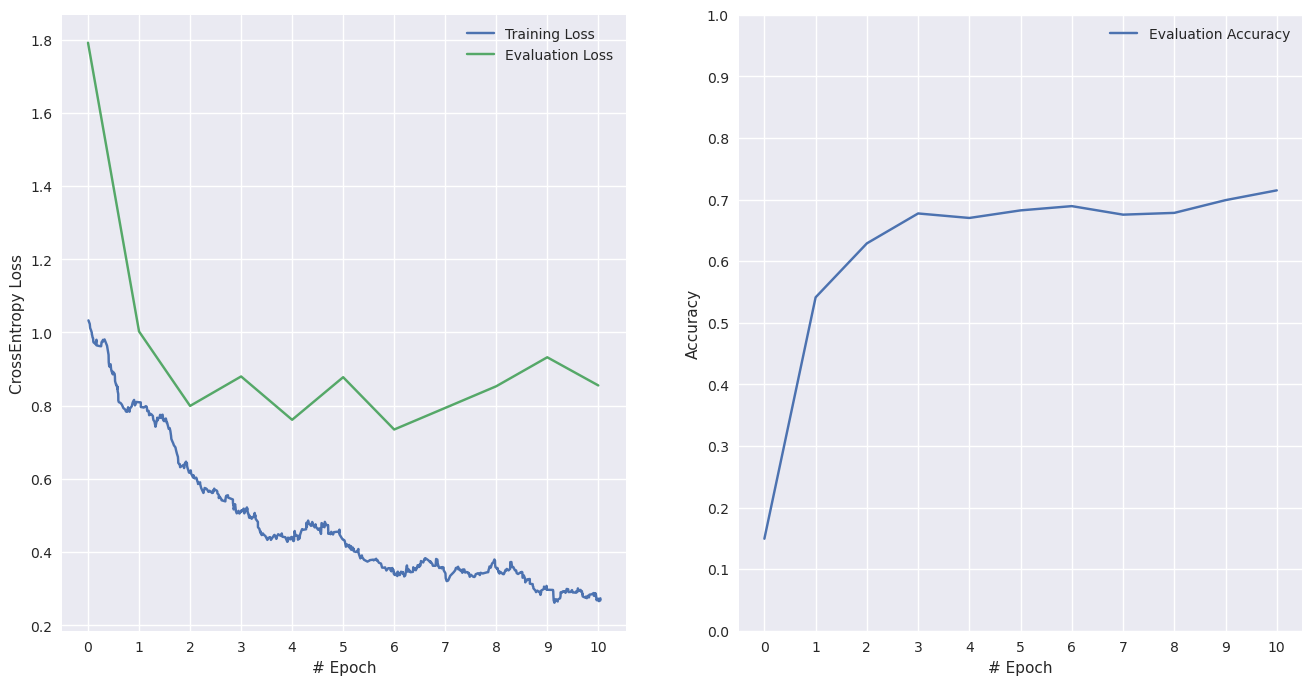

In [196]:
fig = visualize_training(rnn_loss, rnn_eval_loss, rnn_acc, loss_ind)
fig.show()

## Final Comparison

In [212]:

def compare_models(losses, eval_losses, accs, model_names, loss_inds):

    assert len(losses)==len(eval_losses)==len(accs)==len(model_names)
    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(2,2, figsize=(16,16))
    n = len(losses)


    ax[1,1].axis('off')

    for i in range(n):

        train_loss = losses[i]
        eval_loss = eval_losses[i]
        accuracy = accs[i]
        loss_ind = loss_inds[i]
        model_name = model_names[i]

        if len(eval_loss) == 11:
            xticks = range(0, (num_epochs+1)*num_iterations,num_iterations)
            ta = xticks
            tc = np.arange(0, num_epochs+1)
        else:
            xticks = range(num_iterations, (num_epochs+1)*num_iterations,num_iterations)
            ta = range(0, (num_epochs+1)*num_iterations,num_iterations)
            tc = np.arange(0, num_epochs+1)




        smooth_loss = smooth_curve(train_loss, 51)
        if loss_ind is None:
            ax[0,0].plot(smooth_loss, label=model_name)
        else:
            ax[0,0].plot(loss_ind, smooth_loss, label=model_name)

        ax[0,1].plot(xticks, eval_loss, label=model_name)

        ax[1,0].plot(accuracy, label=model_name)
     
    
            
    ax[0,0].grid(True)
    ax[0,0].set_xlabel("# Epoch")
    ax[0,0].set_ylabel("CrossEntropy Loss")
    ax[0,0].set_xticks(ta, tc)
    ax[0,0].legend()
    ax[0,0].set_title('Train Loss')

    ax[0,1].grid(True)
    ax[0,1].set_xlabel("# Epoch")
    ax[0,1].set_ylabel("CrossEntropy Loss")
    ax[0,1].set_xticks(ta, tc)
    ax[0,1].legend()
    ax[0,1].set_title('Evaluation Loss')

    ax[1,0].grid(True)
    ax[1,0].set_yticks(np.arange(0.0, 1.1, 0.1).tolist())
    ax[1,0].set_xlabel("# Epoch")
    ax[1,0].set_ylabel("Accuracy")
    ax[1,0].grid(True)
    ax[1,0].set_ylim(0.0,1.0)
    ax[1,0].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax[1,0].legend()
    ax[1,0].set_title('Evaluation Accuracy')


    return fig

    

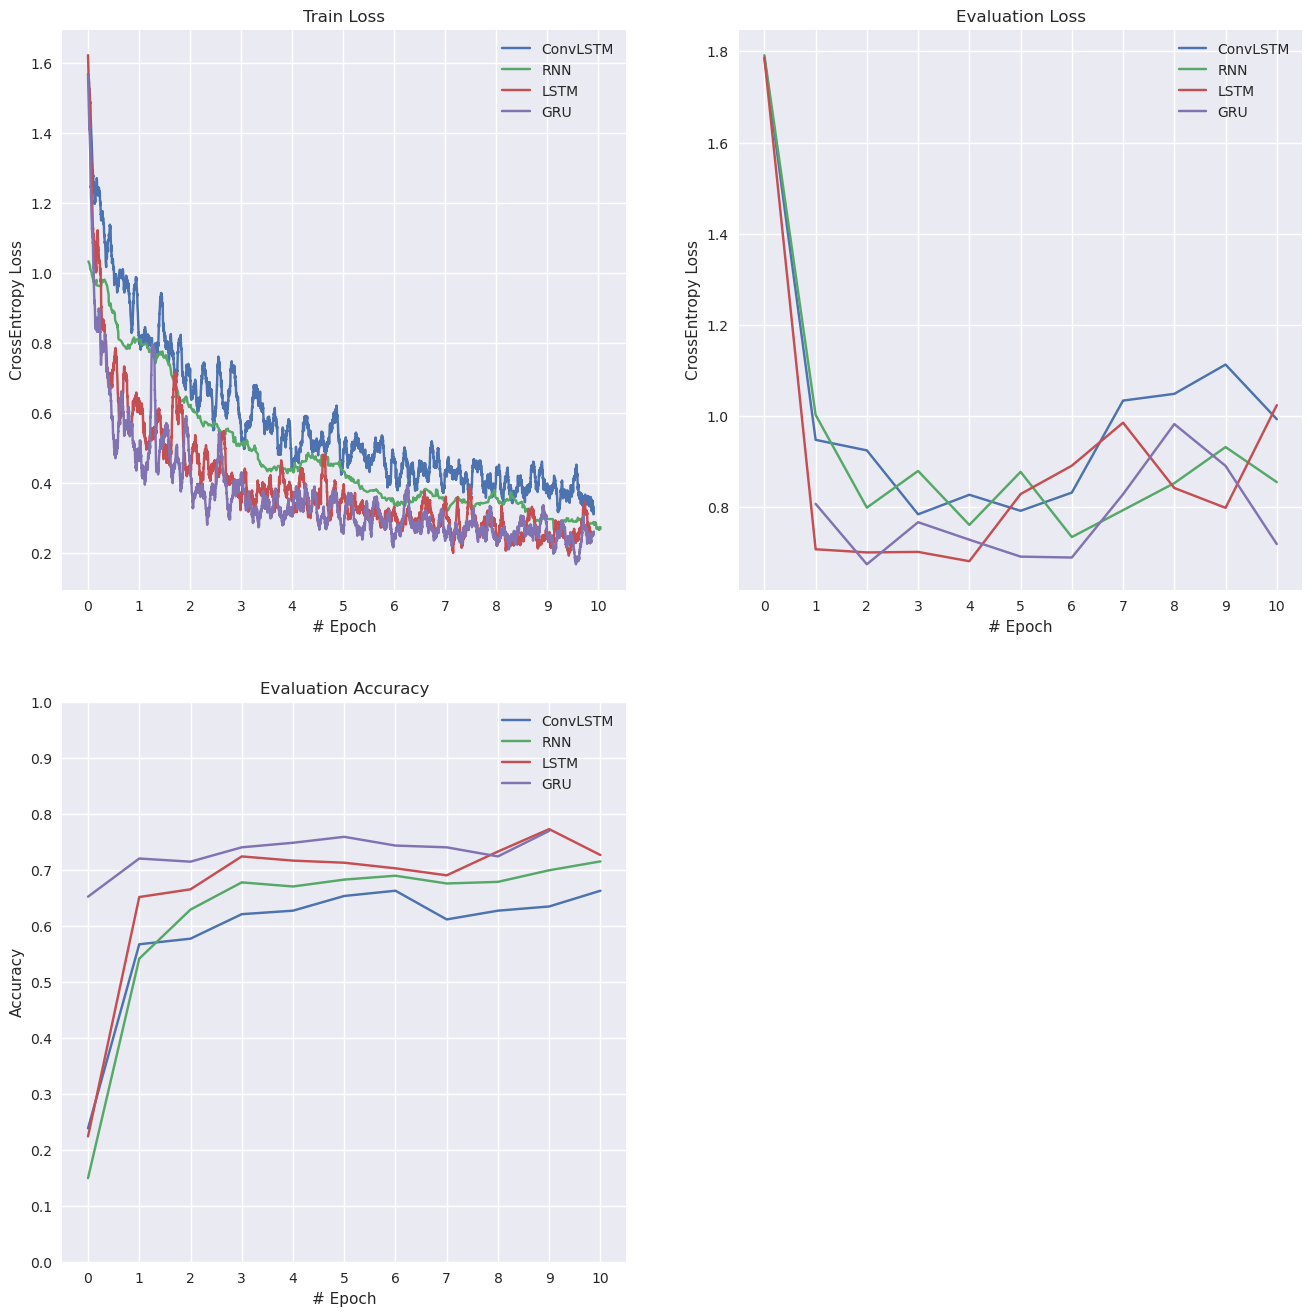

In [213]:
fig = compare_models([clstm_loss, rnn_loss, lstm_loss, gru_loss], [clstm_eval_loss, rnn_eval_loss, lstm_eval_loss, gru_eval_loss], [clstm_accuracy, rnn_acc, lstm_accuracy, gru_accuracy], ['ConvLSTM', 'RNN', 'LSTM', 'GRU'], [None, loss_ind, None, None])